In [ ]:
#Installing necessary packages
!pip install geopandas

     |████████████████████████████████| 931kB 3.3MB/s 
     |████████████████████████████████| 14.7MB 300kB/s 
     |████████████████████████████████| 10.9MB 25.8MB/s 


In [ ]:
##Importing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import csv
import geopandas as gpd

In [ ]:
#Loading demographic data 
demo_data_2018 = pd.read_csv('ny_acs_2018')
demo_data_2018['year'] = '2018'
demo_data_2017 = pd.read_csv('ny_acs_2017')
demo_data_2017['year'] = '2017'
demo_data_2016 = pd.read_csv('ny_acs_2016')
demo_data_2016['year'] = '2016'
demo_data_2015 = pd.read_csv('ny_acs_2015')
demo_data_2015['year'] = '2015'
demo_data_2014 = pd.read_csv('ny_acs_2014')
demo_data_2014['year'] = '2014'
demo_data_2013 = pd.read_csv('ny_acs_2013')
demo_data_2013['year'] = '2013'
demo_data_2012 = pd.read_csv('ny_acs_2012')
demo_data_2012['year'] = '2012'
demo_data_2011 = pd.read_csv('ny_acs_2011')
demo_data_2011['year'] = '2011'
demo_data_2010 = pd.read_csv('ny_acs_2010')
demo_data_2010['year'] = '2010'

#svi_data = pd.read_csv('Data/Demographic Data/NY_CensusTract_Social_Vulnerability_Index.csv')

FileNotFoundError: ignored

In [ ]:
#Defining logic to calculate hellinger distance - probability distribution of a community's SES wrt ideal conditions
def calc_dist_from_ideal(row,div_int):

#div_int is the number of classes within each probability distribution
  dist_array = np.array(row)
  
  #Assigning probability = 1 for all ideal conditions
  observation = np.cumsum(dist_array/max(np.sum(dist_array),1))

  if np.sum(dist_array) > 0:
    anc = [1]*len(dist_array)
  else:
    anc = [0]*len(dist_array)
  
  #Calculating probability distribution of ideal condition for each of the classes uniformly
  reference = np.cumsum([h / div_int for h in anc])

  return(calc_hellinger_dist(reference, observation))

In [ ]:
#Calculating Hellinger Distance
def calc_hellinger_dist(p,q):

  import numpy as np
  from scipy.linalg import norm
  from scipy.spatial.distance import euclidean


  _SQRT2 = np.sqrt(2)     # sqrt(2) with default precision np.float64
  return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

In [ ]:
#Applying hellinger distance for all income variables

income_vars = [ 'income_less_10000','income_10000_14999','income_15000_19999','income_20000_24999','income_25000_29999',
                'income_30000_34999','income_35000_39999','income_40000_44999','income_45000_49999','income_50000_59999','income_60000_74999',
                'income_75000_99999','income_100000_124999','income_125000_149999','income_150000_199999','income_200000_or_more']

demo_data_2018['income_dist'] = demo_data_2018[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2017['income_dist'] = demo_data_2017[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2016['income_dist'] = demo_data_2016[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2015['income_dist'] = demo_data_2015[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2014['income_dist'] = demo_data_2014[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2013['income_dist'] = demo_data_2013[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2012['income_dist'] = demo_data_2012[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2011['income_dist'] = demo_data_2011[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)
demo_data_2010['income_dist'] = demo_data_2010[income_vars].apply(calc_dist_from_ideal,div_int=16,axis=1)

In [ ]:
#Applying hellinger distance for all education variables

education_vars = ['high_school_diploma','less_one_year_college','one_year_more_college','bachelors_degree', 'masters_degree']

demo_data_2018['edu_dist'] = demo_data_2018[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2017['edu_dist'] = demo_data_2017[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2016['edu_dist'] = demo_data_2016[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2015['edu_dist'] = demo_data_2015[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2014['edu_dist'] = demo_data_2014[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2013['edu_dist'] = demo_data_2013[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2012['edu_dist'] = demo_data_2012[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2011['edu_dist'] = demo_data_2011[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)
demo_data_2010['edu_dist'] = demo_data_2010[education_vars].apply(calc_dist_from_ideal,div_int=5,axis=1)

In [ ]:
#Concating Yearly Data to derive time-series variables
demo_data = pd.concat((demo_data_2011,demo_data_2012,demo_data_2013,demo_data_2018))
demo_data.head()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,...,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,pop_25_years_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,do_date,year,income_dist,edu_dist
0,370010217013,269.0,114.0,1991.0,22.0,156.0,29.0,22.0,16.0,33.0,11.0,15.0,38.0,0.0,586,198,388,83.7,584,2,0,0,0,0,0,586,0.0,383,39926.0,37306.0,383,0,0,0,1463.0,48.6,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,49.0,158.0,139.0,584.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,586.0,586.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0072e+07,2011,0.146846,NaN
1,80010085064,147.0,13.0,1981.0,0.0,61.0,26.0,15.0,0.0,38.0,0.0,20.0,0.0,0.0,308,166,142,76.8,269,12,0,18,0,0,9,290,0.0,160,17500.0,17991.0,192,32,32,0,785.0,42.7,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,7.0,0.0,25.0,0.0,104.0,287.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,308.0,308.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0072e+07,2011,0.614372,NaN
2,360610094001,10.0,8.0,1959.0,0.0,10.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,27,18,9,84.4,17,0,0,0,10,0,0,27,0.0,18,9750.0,15352.0,18,0,0,0,495.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,17.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,27.0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0072e+07,2011,0.699237,NaN
3,40131055031,93.0,0.0,1981.0,0.0,62.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93,13,80,54.7,93,0,0,0,0,0,0,93,0.0,93,8450.0,8815.0,122,29,29,0,536.0,50.0,0.0,0.0,0.0,0.0,...,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,93.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0072e+07,2011,1.005937,NaN
4,245102717001,151.0,0.0,1961.0,0.0,0.0,19.0,0.0,30.0,74.0,14.0,0.0,0.0,0.0,326,138,188,75.2,148,178,0,0,0,0,0,326,0.0,151,9035.0,11009.0,181,30,30,0,224.0,28.7,14.0,0.0,14.0,0.0,...,0.0,17.0,5.0,12.0,12.0,26.0,31.0,56.0,148.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,326.0,326.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0072e+07,2011,0.939212,NaN


In [ ]:
demo_data.shape

(280889, 168)

In [ ]:
#def calc_time_series_vars(census_data,variable_list):
  
 # df = demo_data_2018[['geo_id']]
  #vars = variable_list
  #year = list(2018,2019)

  #for j in vars:
   # for i in year:
    #    df['{}_{}_{}'.format(i-1,i,j)] = (census_data.loc[census_data['year'] == str(i), j] - census_data.loc[census_data['year'] == str(i-1), j])

  #return df

In [ ]:
#Calculate Time Series Variables (difference of population, income, education over years)
def calc_time_series_vars_2(census_data,variable_list):
  
  df = demo_data_2018[['geo_id']]
  vars = variable_list
  year = [2013,2018]

  for j in vars:
      df['2018_2013_{}'.format(j)] = (census_data.loc[census_data['year'] == str(2018), j] - census_data.loc[census_data['year'] == str(2013), j])

  return df

In [ ]:
#Deriving race based features and changes between 2013 and 2018
demo_data['other_races'] = demo_data['black_pop']+ demo_data['asian_pop'] + demo_data['hispanic_pop'] + demo_data['amerindian_pop'] + demo_data['other_race_pop'] + demo_data['two_or_more_races_pop']
var_list = ['median_rent','income_dist','edu_dist','white_pop','other_races']
df = calc_time_series_vars_2(demo_data,var_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#Calculating time series for a different set of years
def calc_time_series_vars_3(census_data,variable_list):
  
  df = demo_data_2018[['geo_id']]
  vars = variable_list
  year = [2011,2012]

  for j in vars:
      df['2012_2011_{}'.format(j)] = (census_data.loc[census_data['year'] == str(2012), j] - census_data.loc[census_data['year'] == str(2011), j])

  return df

In [ ]:
df2 = calc_time_series_vars_3(demo_data,var_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.head()

,geo_id,2012_2011_median_rent,2012_2011_income_dist,2012_2011_edu_dist,2012_2011_white_pop,2012_2011_other_races
0,350399407003,254.0,0.109796,NaN,-216.0,17.0
1,350390003001,-557.0,0.287356,NaN,-136.0,170.0
2,350399408001,-307.0,0.214912,NaN,0.0,59.0
3,350390002002,801.0,-0.822011,NaN,17.0,0.0
4,350399408002,1394.0,-0.559915,NaN,720.0,-144.0


In [ ]:
df = df.merge(df2,how='left',on='geo_id')
df.head()

,geo_id,2018_2013_median_rent,2018_2013_income_dist,2018_2013_edu_dist,2018_2013_white_pop,2018_2013_other_races,2012_2011_median_rent,2012_2011_income_dist,2012_2011_edu_dist,2012_2011_white_pop,2012_2011_other_races
0,350399407003,197.0,NaN,-0.001875,143.0,989.0,254.0,0.109796,NaN,-216.0,17.0
1,350390003001,160.0,NaN,-0.309810,78.0,950.0,-557.0,0.287356,NaN,-136.0,170.0
2,350399408001,-775.0,NaN,0.005787,161.0,1268.0,-307.0,0.214912,NaN,0.0,59.0
3,350390002002,198.0,NaN,-0.174471,-381.0,1708.0,801.0,-0.822011,NaN,17.0,0.0
4,350399408002,-974.0,NaN,-0.029654,102.0,1607.0,1394.0,-0.559915,NaN,720.0,-144.0


In [ ]:
df.shape

(74520, 12)

In [ ]:
#Defining gentrification as a increase in median rent, decrease in income distribution, decreases in education distribution
def f(row):
    if row['2018_2013_median_rent'] > 0 and row['2018_2013_income_dist'] < 0 and row['2018_2013_white_pop'] > 0:
        val = 1
    else:
        val = 0
    return val

df['gentrification'] = df.apply(f, axis=1)

In [ ]:
df['gentrification'].value_counts()

0    66394
1     8126
Name: gentrification, dtype: int64

## Spatial Engineering


In [ ]:
#Installing needed libraries
!pip install libpysal
!pip install splot

In [ ]:
#importing needed libraries
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [ ]:
#Getting all GeoIDs in NYC
ny_geoid = pd.read_csv('ny_geoid.csv')
ny_geoid = list(ny_geoid['GEOID'])

In [ ]:
#Loading the spatial data 
spatial_data = gpd.read_file('tl_2019_36_bg.shp')
spatial_data['GEOID'] = spatial_data['GEOID'].astype(int)
spatial_data = spatial_data.loc[spatial_data['GEOID'].isin(ny_geoid)]
spatial_data.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
3,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747..."
4,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680..."
5,36,081,122702,1,360811227021,Block Group 1,G5030,S,72543,0,+40.7312033,-073.8128367,"POLYGON ((-73.81502 40.73047, -73.81492 40.732..."
6,36,081,028300,5,360810283005,Block Group 5,G5030,S,36881,0,+40.7495638,-073.8856985,"POLYGON ((-73.88654 40.75159, -73.88561 40.751..."
7,36,081,148300,4,360811483004,Block Group 4,G5030,S,286390,0,+40.7732667,-073.7501807,"POLYGON ((-73.75557 40.77153, -73.75550 40.771..."


In [ ]:
#Calculating queen weights for each GeoID (census tract)
w = Queen.from_dataframe(spatial_data,idVariable='GEOID')
w.transform = 'R'

('WARNING: ', 360610001001, ' is an island (no neighbors)')


/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 360610001001.
  warnings.warn(message)


In [ ]:
#Combining spatial data with time series gentrification data 
spatial_data['GEOID'] = spatial_data['GEOID'].astype(int)
spatial_data = spatial_data.merge(df, how='left',left_on='GEOID',right_on='geo_id')
spatial_data.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,geo_id,2018_2013_median_rent,2018_2013_income_dist,2018_2013_edu_dist,2018_2013_white_pop,2018_2013_other_races,2012_2011_median_rent,2012_2011_income_dist,2012_2011_edu_dist,2012_2011_white_pop,2012_2011_other_races,gentrification
0,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747...",3.608103e+11,755.0,0.055275,-0.131566,15.0,-142.0,722.0,0.029196,NaN,-105.0,-50.0,0.0
1,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",3.608102e+11,-1.0,0.135300,0.035031,-1972.0,1246.0,-73.0,0.232832,NaN,658.0,-830.0,0.0
2,36,081,122702,1,360811227021,Block Group 1,G5030,S,72543,0,+40.7312033,-073.8128367,"POLYGON ((-73.81502 40.73047, -73.81492 40.732...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,081,028300,5,360810283005,Block Group 5,G5030,S,36881,0,+40.7495638,-073.8856985,"POLYGON ((-73.88654 40.75159, -73.88561 40.751...",3.608103e+11,976.0,-0.358940,-0.098995,392.0,1611.0,-191.0,-0.026635,NaN,-334.0,124.0,1.0
4,36,081,148300,4,360811483004,Block Group 4,G5030,S,286390,0,+40.7732667,-073.7501807,"POLYGON ((-73.75557 40.77153, -73.75550 40.771...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Installing more packages
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
!pip install pysal

In [ ]:
#Importing needed libraries
import pysal
from libpysal import weights

In [ ]:
#Fill NAs with 0 for spatial lag calculations
spatial_data = spatial_data.fillna(0)

In [ ]:
spatial_data

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,geo_id,2018_2013_median_rent,2018_2013_income_dist,2018_2013_edu_dist,2018_2013_white_pop,2018_2013_other_races,2012_2011_median_rent,2012_2011_income_dist,2012_2011_edu_dist,2012_2011_white_pop,2012_2011_other_races,gentrification
0,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747...",3.608103e+11,755.0,0.055275,-0.131566,15.0,-142.0,722.0,0.029196,0.0,-105.0,-50.0,0.0
1,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",3.608102e+11,-1.0,0.135300,0.035031,-1972.0,1246.0,-73.0,0.232832,0.0,658.0,-830.0,0.0
2,36,081,122702,1,360811227021,Block Group 1,G5030,S,72543,0,+40.7312033,-073.8128367,"POLYGON ((-73.81502 40.73047, -73.81492 40.732...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,36,081,028300,5,360810283005,Block Group 5,G5030,S,36881,0,+40.7495638,-073.8856985,"POLYGON ((-73.88654 40.75159, -73.88561 40.751...",3.608103e+11,976.0,-0.358940,-0.098995,392.0,1611.0,-191.0,-0.026635,0.0,-334.0,124.0,1.0
4,36,081,148300,4,360811483004,Block Group 4,G5030,S,286390,0,+40.7732667,-073.7501807,"POLYGON ((-73.75557 40.77153, -73.75550 40.771...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,36,005,021100,3,360050211003,Block Group 3,G5030,S,42251,0,+40.8391029,-073.9244240,"POLYGON ((-73.92578 40.83923, -73.92527 40.840...",3.600502e+11,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6822,36,005,019700,1,360050197001,Block Group 1,G5030,S,29094,0,+40.8354716,-073.9179964,"POLYGON ((-73.91841 40.83644, -73.91743 40.836...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6823,36,119,005300,2,361190053002,Block Group 2,G5030,S,364352,11715,+40.9152303,-073.8101624,"POLYGON ((-73.81385 40.91234, -73.81351 40.913...",3.611901e+11,1275.0,0.137428,-0.352017,1014.0,538.0,905.0,-0.046358,0.0,-243.0,207.0,0.0
6824,36,119,006200,4,361190062004,Block Group 4,G5030,S,138867,0,+40.9089470,-073.7985799,"POLYGON ((-73.80188 40.91177, -73.80137 40.911...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
#Calculating spatial weights
import libpysal as lps

spatial_data['lagged_spatial_rent'] = lps.weights.lag_spatial(w, spatial_data['2012_2011_median_rent'])
spatial_data['lagged_income_dist'] = lps.weights.lag_spatial(w, spatial_data['2012_2011_income_dist'])
spatial_data['lagged_edu_dist'] = lps.weights.lag_spatial(w, spatial_data['2012_2011_edu_dist'])
spatial_data['lagged_white_pop'] = lps.weights.lag_spatial(w, spatial_data['2012_2011_white_pop'])
spatial_data['lagged_other_races'] = lps.weights.lag_spatial(w, spatial_data['2012_2011_other_races'])

In [ ]:
spatial_data.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,geo_id,2018_2013_median_rent,2018_2013_income_dist,2018_2013_edu_dist,2018_2013_white_pop,2018_2013_other_races,2012_2011_median_rent,2012_2011_income_dist,2012_2011_edu_dist,2012_2011_white_pop,2012_2011_other_races,gentrification,lagged_spatial_rent,lagged_income_dist,lagged_edu_dist,lagged_white_pop,lagged_other_races
0,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747...",3.608103e+11,755.0,0.055275,-0.131566,15.0,-142.0,722.0,0.029196,0.0,-105.0,-50.0,0.0,-195.800,-0.041566,0.0,171.800,-315.60
1,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680...",3.608102e+11,-1.0,0.135300,0.035031,-1972.0,1246.0,-73.0,0.232832,0.0,658.0,-830.0,0.0,25.000,-0.082157,0.0,-21.250,-189.25
2,36,081,122702,1,360811227021,Block Group 1,G5030,S,72543,0,+40.7312033,-073.8128367,"POLYGON ((-73.81502 40.73047, -73.81492 40.732...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-112.375,-0.061903,0.0,-76.375,66.00
3,36,081,028300,5,360810283005,Block Group 5,G5030,S,36881,0,+40.7495638,-073.8856985,"POLYGON ((-73.88654 40.75159, -73.88561 40.751...",3.608103e+11,976.0,-0.358940,-0.098995,392.0,1611.0,-191.0,-0.026635,0.0,-334.0,124.0,1.0,-84.000,0.046189,0.0,-256.750,441.50
4,36,081,148300,4,360811483004,Block Group 4,G5030,S,286390,0,+40.7732667,-073.7501807,"POLYGON ((-73.75557 40.77153, -73.75550 40.771...",0.000000e+00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-65.875,0.019765,0.0,-170.125,236.25


Without dividing imbalanced classes

In [ ]:
#Running models as is without balancing the datasets to include equal proportions of each classes for better training setting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

spatial_data_training = spatial_data

features = ['2018_2013_median_rent','2018_2013_income_dist','2018_2013_edu_dist','2018_2013_white_pop','2018_2013_other_races','lagged_spatial_rent','lagged_income_dist','lagged_edu_dist','lagged_white_pop','lagged_other_races']

X = spatial_data_training[features]
y = spatial_data_training['gentrification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)

param_grid ={"max_depth":[x for x in range(1,10,1)]} 

fr = RandomForestClassifier(n_estimators=100)
gr = GridSearchCV(fr,param_grid=param_grid,cv=5)
rs=gr.fit(X_train,y_train) 

rf_predictions = rs.predict(X_test)
rf_probs = rs.predict_proba(X_test)[:, 1]

#Calculating roc,precision,recall - we are more interested in the recall prediction - that will be our actual prediciton score 
#Recall tells the probability of classifying gentrification correctly
roc_value = roc_auc_score(y_test, rf_probs)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)


print('The roc is {}'.format(roc_value))
print('The precision is {}'.format(precision))
print('The recall is {}'.format(recall))

The roc is 1.0
The precision is 1.0
The recall is 0.9242424242424242


In [ ]:
#Correctly predicted classes for each gentrification = 0 and 1
from sklearn.metrics import confusion_matrix
print('Confusion matrix\n',confusion_matrix(y_test,rf_predictions))

Confusion matrix
 [[1982    0]
 [   5   61]]


In [ ]:
#Feature Importance (Gini importance)
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)

pd.DataFrame({"importance":rf.feature_importances_},index=X_train.columns).sort_values(by=["importance"],ascending=False)[:10]

,importance
2018_2013_white_pop,0.411610
2018_2013_income_dist,0.347895
2018_2013_other_races,0.103836
2018_2013_median_rent,0.064460
2018_2013_edu_dist,0.045272
lagged_white_pop,0.007336
lagged_spatial_rent,0.006948
lagged_other_races,0.006667
lagged_income_dist,0.005977
lagged_edu_dist,0.000000


Dividing imbalanced classes

In [ ]:
#Running stratified k fold sampling
skf = StratifiedKFold(n_splits=5)

skf.get_n_splits(X, y)

5

In [ ]:
i=1
roc_score =[]
precision_val = []
recall_val = []

for train_index,test_index in skf.split(X,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]

    param_grid ={"max_depth":[x for x in range(1,10,1)]} 

    fr = RandomForestClassifier(n_estimators=100)
    gr = GridSearchCV(fr,param_grid=param_grid,cv=5)

    rs=gr.fit(xtr,ytr) 

    rf_predictions = rs.predict(xvl)
    rf_probs = rs.predict_proba(xvl)[:, 1]
    # Calculate roc auc
    roc_value = roc_auc_score(yvl, rf_probs)
    print('ROC AUC score:',roc_value)
    roc_score.append(roc_value) 
    precision = precision_score(yvl, rf_predictions)
    print('Precision score:',precision)
    precision_val.append(precision) 
    recall = recall_score(yvl, rf_predictions)
    print('Recall score:',recall)
    recall_val.append(recall) 
    i+=1

1 of KFold 5
ROC AUC score: 1.0
Precision score: 1.0
Recall score: 0.9772727272727273
2 of KFold 5
ROC AUC score: 1.0
Precision score: 1.0
Recall score: 0.9767441860465116
3 of KFold 5
ROC AUC score: 1.0
Precision score: 1.0
Recall score: 1.0
4 of KFold 5
ROC AUC score: 0.9999648172254865
Precision score: 1.0
Recall score: 0.9767441860465116
5 of KFold 5
ROC AUC score: 1.0
Precision score: 1.0
Recall score: 0.9318181818181818


In [ ]:
print('\nMean ROC Score',np.mean(roc_score))
print('\nMean Precision Score',np.mean(precision))
print('\nMean Recall Score',np.mean(recall))


Mean ROC Score 0.9999929634450974

Mean Precision Score 1.0

Mean Recall Score 0.9318181818181818


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


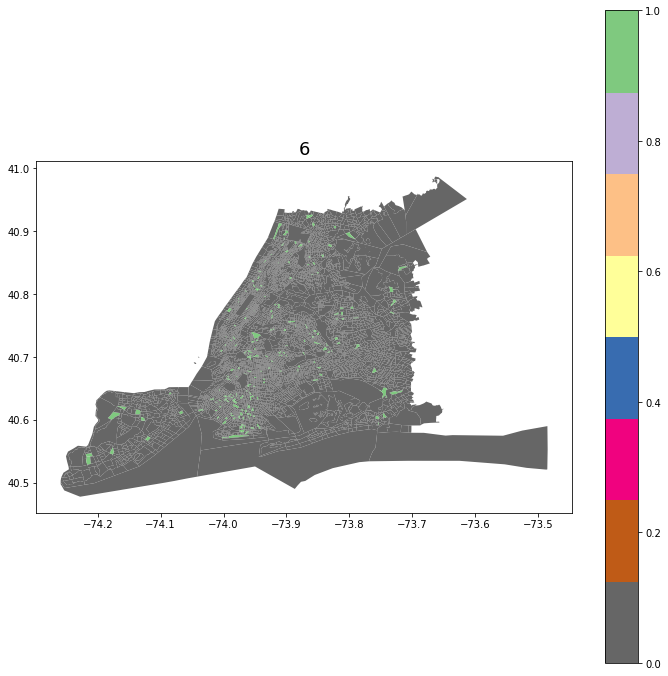

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))

ax.set_title(i, fontsize=18)
spatial_data.plot(axes=ax, column='gentrification', legend = True, cmap='Accent_r')

#supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_s...


In [ ]:
ceqr_bbl = pd.read_csv('ceqr_bbl.csv')
ceqr_bbl.head()

,Unnamed: 0,Borough_and,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,...,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,CEQR,Project Description,Borough_or,Lead Agency,URL,Community District,House Number,Street Name,Postcode,Project Name,Milestone Name,Milestone Date,GEOID
0,0,MN,202,18,103,29.0,3000,2,1,10013,E009,5,15,7700,1,3,1A,54 BOWERY,C6-1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K7,5.0,0,NaN,HSBC BANK USA,8804,17616,17616,0,0,17616,...,3.44,6.0,4.8,1,1.002020e+09,0,29,985200,200186,12c,NaN,101S032,10105.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,t,40.716141,-73.996573,NaN,409.843942,9277.572064,"POLYGON ((985238.077736333 200123.707085833, 9...",19DCP009K,"The applicant, Slwest Old Fulton, LLC., reques...",Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK02,NaN,NaN,NaN,50 Old Fulton Rezoning,EAS,2019-10-25,360610029003
1,1,MN,2050,100,109,227.0,2000,6,7,10031,L023,30,17,720,1,9,3B,13 HAMILTON TERRACE,R6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D1,3.0,0,NaN,"HAMILTON HEIGHTS ASSOCIATES, LLC",9639,49616,0,49616,0,0,...,3.00,0.0,3.0,1,1.020500e+09,0,227,999027,238782,6a,NaN,111S039,10709.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,NaN,40.822065,-73.946610,NaN,511.963108,12292.509388,"POLYGON ((999058.6373655051 238821.8488495052,...",17DCP176K,"The applicant, MADDD Equities, LLC, is seeking...",Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK02,NaN,NaN,NaN,Tillary and Prince Streets Rezoning,EAS,2017-09-15,360610227002
2,2,MN,567,5,102,59.0,1000,2,2,10003,E033,6,15,5700,1,2,3A,29 5 AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D9,3.0,0,NaN,HDH3.2 LLC,2633,16247,1000,15247,1000,0,...,10.00,0.0,10.0,1,1.005670e+09,0,59,985538,206356,12c,NaN,103 022,10207.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,t,40.733076,-73.995353,NaN,258.927336,2720.867294,"POLYGON ((985590.2955358475 206343.231392175, ...",10DCP019Q,To rezone approx 890 acres (on 238 blocks) of ...,Queens,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,QN01,NaN,NaN,NaN,Astoria Rezoning,EAS,2010-01-22,360610059001
3,3,BX,2624,41,201,75.0,1000,7,17,10455,E073,40,23,4000,2,1,2B,600 EAST 156 STREET,R8A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D9,3.0,0,NaN,600 EAST 156TH STREET HOUSING DEV. FUND CORP.,23000,209853,22750,0,0,0,...,6.02,0.0,6.5,2,2.026240e+09,0,75,1009341,237548,6c,NaN,209N096,21003.0,NaN,2.026240e+09,01/29/2016,1,NaN,NaN,20v3,NaN,40.818654,-73.909349,NaN,679.378721,24490.931164,"POLYGON ((1009438.294099584 237464.3200685084,...",17DCP025X,"The applicant, 600 Associates, LLC, is seeking...",Bronx,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BX01,NaN,NaN,NaN,600 East 156th Street Rezoning,EAS,2016-11-10,360050075001
4,4,BX,3237,38,207,269.0,2000,10,14,10463,E081,52,21,320,2,7,1A,2546 BAILEY AVENUE,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0,NaN,2546 ENTERPRISES LLC,1150,2160,0,1440,0,0,...,2.43,0.0,4.8,2,2.032370e+09,0,269,1009743,255479,3c,NaN,214 035,21111.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,NaN,40.867869,-73.907829,NaN,145.904798,1095.820525,"POLYGON ((1009773.28883642 255479.50647901, 10...",05DCP040K,An amendment to the Zoning Map to change an M1...,Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK04,70,WYCKOFF AVENUE,11237.0,Wyckoff Avenue Rezoning,Lead Agency Letter,2005-01-13,360050269002


In [ ]:
ceqr_bbl = ceqr_bbl.merge(spatial_data['gentrification'],left_on=ceqr_bbl['GEOID'],right_on=spatial_data['GEOID'],how='left')
ceqr_bbl.head()

,key_0,Unnamed: 0,Borough_and,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,Sanitboro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,...,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry,CEQR,Project Description,Borough_or,Lead Agency,URL,Community District,House Number,Street Name,Postcode,Project Name,Milestone Name,Milestone Date,GEOID,gentrification
0,360610029003,0,MN,202,18,103,29.0,3000,2,1,10013,E009,5,15,7700,1,3,1A,54 BOWERY,C6-1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K7,5.0,0,NaN,HSBC BANK USA,8804,17616,17616,0,0,...,6.0,4.8,1,1.002020e+09,0,29,985200,200186,12c,NaN,101S032,10105.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,t,40.716141,-73.996573,NaN,409.843942,9277.572064,"POLYGON ((985238.077736333 200123.707085833, 9...",19DCP009K,"The applicant, Slwest Old Fulton, LLC., reques...",Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK02,NaN,NaN,NaN,50 Old Fulton Rezoning,EAS,2019-10-25,360610029003,0.0
1,360610227002,1,MN,2050,100,109,227.0,2000,6,7,10031,L023,30,17,720,1,9,3B,13 HAMILTON TERRACE,R6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D1,3.0,0,NaN,"HAMILTON HEIGHTS ASSOCIATES, LLC",9639,49616,0,49616,0,...,0.0,3.0,1,1.020500e+09,0,227,999027,238782,6a,NaN,111S039,10709.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,NaN,40.822065,-73.946610,NaN,511.963108,12292.509388,"POLYGON ((999058.6373655051 238821.8488495052,...",17DCP176K,"The applicant, MADDD Equities, LLC, is seeking...",Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK02,NaN,NaN,NaN,Tillary and Prince Streets Rezoning,EAS,2017-09-15,360610227002,0.0
2,360610059001,2,MN,567,5,102,59.0,1000,2,2,10003,E033,6,15,5700,1,2,3A,29 5 AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D9,3.0,0,NaN,HDH3.2 LLC,2633,16247,1000,15247,1000,...,0.0,10.0,1,1.005670e+09,0,59,985538,206356,12c,NaN,103 022,10207.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,t,40.733076,-73.995353,NaN,258.927336,2720.867294,"POLYGON ((985590.2955358475 206343.231392175, ...",10DCP019Q,To rezone approx 890 acres (on 238 blocks) of ...,Queens,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,QN01,NaN,NaN,NaN,Astoria Rezoning,EAS,2010-01-22,360610059001,0.0
3,360050075001,3,BX,2624,41,201,75.0,1000,7,17,10455,E073,40,23,4000,2,1,2B,600 EAST 156 STREET,R8A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D9,3.0,0,NaN,600 EAST 156TH STREET HOUSING DEV. FUND CORP.,23000,209853,22750,0,0,...,0.0,6.5,2,2.026240e+09,0,75,1009341,237548,6c,NaN,209N096,21003.0,NaN,2.026240e+09,01/29/2016,1,NaN,NaN,20v3,NaN,40.818654,-73.909349,NaN,679.378721,24490.931164,"POLYGON ((1009438.294099584 237464.3200685084,...",17DCP025X,"The applicant, 600 Associates, LLC, is seeking...",Bronx,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BX01,NaN,NaN,NaN,600 East 156th Street Rezoning,EAS,2016-11-10,360050075001,0.0
4,360050269002,4,BX,3237,38,207,269.0,2000,10,14,10463,E081,52,21,320,2,7,1A,2546 BAILEY AVENUE,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0,NaN,2546 ENTERPRISES LLC,1150,2160,0,1440,0,...,0.0,4.8,2,2.032370e+09,0,269,1009743,255479,3c,NaN,214 035,21111.0,NaN,0.000000e+00,NaN,1,NaN,NaN,20v3,NaN,40.867869,-73.907829,NaN,145.904798,1095.820525,"POLYGON ((1009773.28883642 255479.50647901, 10...",05DCP040K,An amendment to the Zoning Map to change an M1...,Brooklyn,Department of City Planning,https://a002-ceqraccess.nyc.gov/ceqr/ProjectIn...,BK04,70,WYCKOFF AVENUE,11237.0,Wyckoff Avenue Rezoning,Lead Agency Letter,2005-01-13,360050269002,0.0


In [ ]:
ceqr_bbl['gentrification'].value_counts()

0.0    71
1.0     4
Name: gentrification, dtype: int64